<a href="https://colab.research.google.com/github/VishnuGupta5883/appliedai/blob/master/Exploratory_Data_Analysis_on_Haberman_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.High level statistics


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Load haberman.csv into a pandas dataFrame.
haberman = pd.read_csv("/content/drive/My Drive/Colab Notebooks/haberman.csv")


In [0]:
# Number of datapoints and features
haberman.shape

(306, 4)

In [0]:
# Name of columns
haberman.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [0]:
# To check top 5 records to know about data
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [0]:
# To check how many datapoins for different tyep of Cancer statuses
haberman['status'].value_counts()

# Haberman is imbalanced dataset as Survival status (status=1) having 75% data points while Not survival(status=2) having 25% data points.

1    225
2     81
Name: status, dtype: int64

# Objective


## 1. Which age group will be cancer survive or not.
## 2. Which year group having maximum Cancer death.
## 3. What should be minimum nodes having maximum possibility of cancer patient survive
## 4. What should be maximum nodes causing cancer death

# Bi-Variate Analysis -Scatter plot , Pair plot

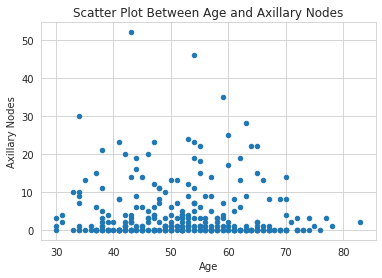

In [34]:
#2-D scatter plot:


#haberman.plot(kind='scatter', x='year', y='age') ;
#haberman.plot(kind='scatter', x='year', y='status') ;
#haberman.plot(kind='scatter', x='age', y='status') ;
#haberman.plot(kind='scatter', x='nodes', y='status') ;
#haberman.plot(kind='scatter', x='nodes', y='year') ;
haberman.plot(kind='scatter', x='age', y='nodes') ;
plt.xlabel('Age');
plt.ylabel('Axillary Nodes');
plt.title('Scatter Plot Between Age and Axillary Nodes');
#plt.legend()
plt.show()

# Didn't observ any segrgation between 2 features.


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


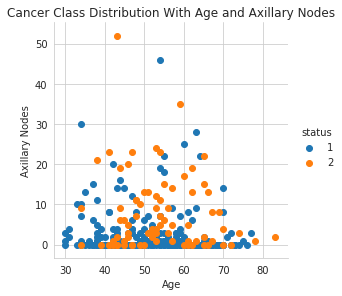

In [35]:
# 2-D Scatter plot with color-coding for each Cancer type/class.
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", size=4) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.xlabel('Age');
plt.ylabel('Axillary Nodes');
plt.title('Cancer Class Distribution With Age and Axillary Nodes');
#plt.legend('Status')
plt.show();
# Didn't observ any signified segregation. 
# No making any sense out of it.

## 3D Pair Plots

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


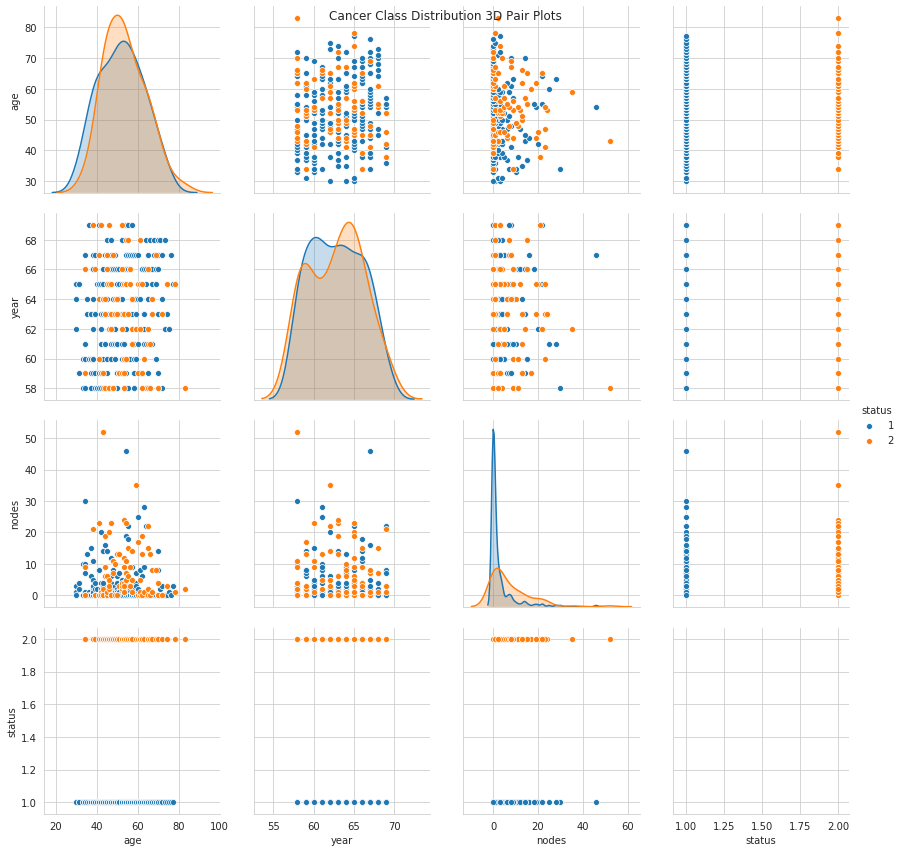

In [12]:
# To check if  any combination making any sense by using pair-plots.
plt.close();
sns.set_style("whitegrid");
g=sns.pairplot(haberman, hue="status", size=3);
#plt.xlabel('Age');
#plt.ylabel('Nodes');
g.fig.suptitle("Cancer Class Distribution 3D Pair Plots ")
#plt.legend('Status')
plt.show()

# Not making any sense out of it.


# Univariate Analysis
# Histogram, PDF, CDF, Boxplot, Voilin

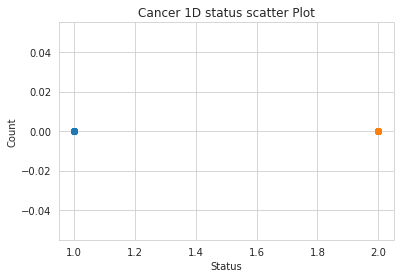

In [15]:
# What about 1-D scatter plot using just one feature?
#1-D scatter plot of cancer status
import numpy as np
Cancer_survival = haberman.loc[haberman["status"] == 1];
Cancer_not_survival = haberman.loc[haberman["status"] == 2];

plt.plot(Cancer_survival["status"], np.zeros_like(Cancer_survival['status']), 'o')
plt.plot(Cancer_not_survival["status"], np.zeros_like(Cancer_not_survival['status']), 'o')

plt.xlabel('Status');
plt.ylabel('Count');
plt.title('Cancer 1D status scatter Plot');
#plt.legend('status')
plt.show()
#Disadvantages of 1-D scatter plot: Very hard to make sense as points 
#are overlapping a lot.
#Are there better ways of visualizing 1-D scatter plots?

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


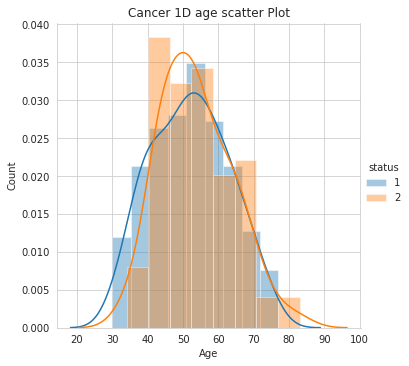

In [16]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.xlabel('Age');
plt.ylabel('Count');
plt.title('Cancer 1D age scatter Plot');
plt.show();

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


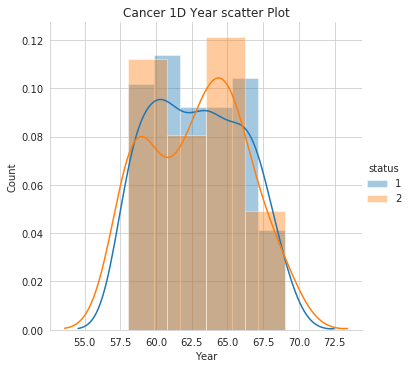

In [22]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.xlabel('Year');
plt.ylabel('Count');
plt.title('Cancer 1D Year scatter Plot');
plt.show();

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


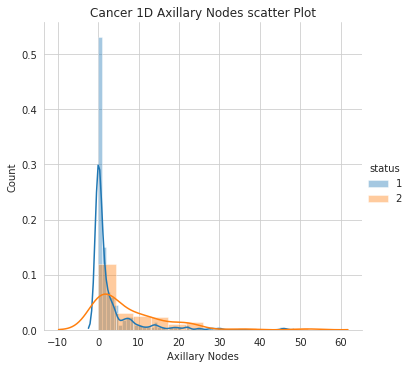

In [36]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.xlabel('Axillary Nodes');
plt.ylabel('Count');
plt.title('Cancer 1D Axillary Nodes scatter Plot');
plt.show();


[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


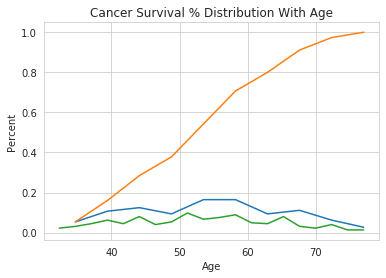

In [24]:
#Plot CDF of Patient age - Survival patient
# 95% of Cancer survival patient having age less than 70.

counts, bin_edges = np.histogram(Cancer_survival['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(Cancer_survival['age'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.xlabel('Age');
plt.ylabel('Percent');
plt.title('Cancer Survival % Distribution With Age');

plt.show();

[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


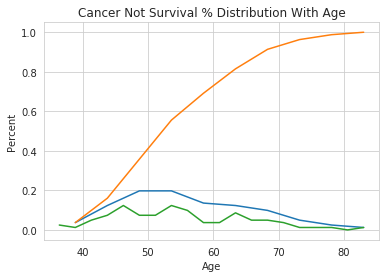

In [33]:
#Plot CDF of Patient age - Non Survival patient

counts, bin_edges = np.histogram(Cancer_not_survival['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(Cancer_not_survival['age'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);
plt.xlabel('Age');
plt.ylabel('Percent');
plt.title('Cancer Not Survival % Distribution With Age');

plt.show();

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


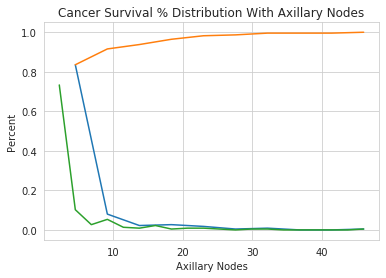

In [32]:
#Plot CDF of Patient axillary node - Survival patient

counts, bin_edges = np.histogram(Cancer_survival['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(Cancer_survival['nodes'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.xlabel('Axillary Nodes');
plt.ylabel('Percent');
plt.title('Cancer Survival % Distribution With Axillary Nodes');
plt.show();

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


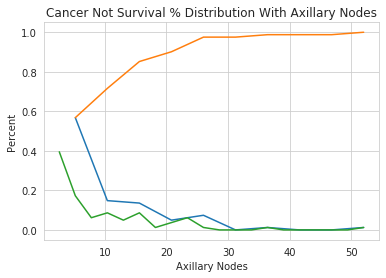

In [31]:
#Plot CDF of Patient age - Non Survival patient
# Cancer Patients having more than 40 axillary nodes causing 99% death.

counts, bin_edges = np.histogram(Cancer_not_survival['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(Cancer_not_survival['nodes'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);
plt.xlabel('Axillary Nodes');
plt.ylabel('Percent');
plt.title('Cancer Not Survival % Distribution With Axillary Nodes');

plt.show();

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


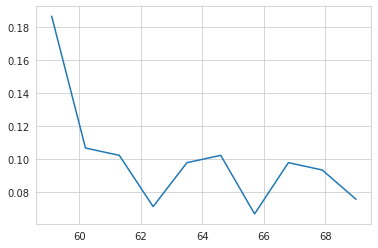

In [0]:
#Plot CDF of Year - Survival patient

counts, bin_edges = np.histogram(Cancer_survival['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
#plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(Cancer_survival['year'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
#plt.plot(bin_edges[1:],pdf);

plt.xlabel('Year');
plt.ylabel('Percent');
plt.title('Cancer Survival % Distribution With Year wise');
plt.show();

[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


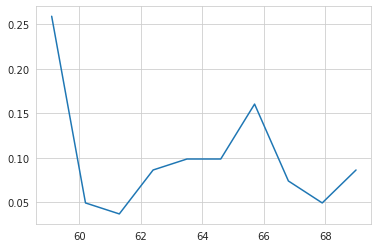

In [0]:
#Plot CDF of Year - Non Survival patient


counts, bin_edges = np.histogram(Cancer_not_survival['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
#plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(Cancer_not_survival['year'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
#plt.plot(bin_edges[1:],pdf);

plt.xlabel('Year');
plt.ylabel('Percent');
plt.title('Cancer Not Survival % Distribution With Year wise');
plt.show();

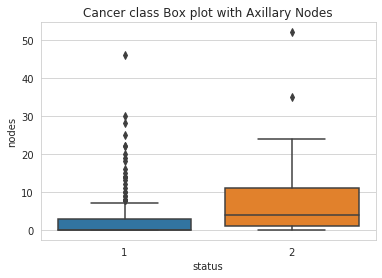

In [28]:
# Box plot and Whiskers
# Minimum 11 Auxiliary nodes causing 75% people Cancer death.
#sns.boxplot(x='status',y='age', data=haberman)
#sns.boxplot(x='status',y='year', data=haberman)
sns.boxplot(x='status',y='nodes', data=haberman).set_title('Cancer class Box plot with Axillary Nodes')
plt.show()

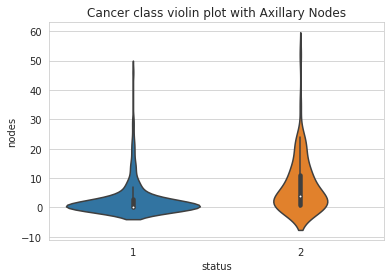

In [30]:
#Violin plot
#sns.violinplot(x="status", y="age", data=haberman, size=8)
#sns.violinplot(x="status", y="year", data=haberman, size=8)
sns.violinplot(x="status", y="nodes", data=haberman, size=8).set_title('Cancer class violin plot with Axillary Nodes')
plt.show()

# Observations

## 1.Haberman is imbalanced dataset as Survival status (status=1) having  73.5% data points while Not survival(status=2) having 26.5% data points.
## 2. 95% of Cancer survival patient having age less than 70.
## 3. Minimum 11 Axiliary nodes causing 75% people Cancer death.
## 4. Cancer Patients having more than 40 axillary nodes causing 99% death.